In [1]:
!pip3 install numpy
!pip3 install scikit-learn
!pip3 install pandas
!pip3 install matplotlib
#!pip3 install --upgrade pip
!pip3 install seaborn



## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


## Load and Review Data

In [3]:
data=pd.read_csv("auto-mpg.csv")
data.shape
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:

print(data["origin"].unique()) #shows that the unique values in origin are 1,2,3

[1 3 2]


In [5]:
data=data.drop("car name", axis=1)# remove car name column
data['origin'] = data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})#replace the origin values with actual places

# Create Dummy Variable for origin

In [6]:
data = pd.get_dummies(data, columns=['origin'])
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,True,False,False
1,15.0,8,350.0,165,3693,11.5,70,True,False,False
2,18.0,8,318.0,150,3436,11.0,70,True,False,False
3,16.0,8,304.0,150,3433,12.0,70,True,False,False
4,17.0,8,302.0,140,3449,10.5,70,True,False,False


In [7]:
data=data.drop("origin_europe",axis=1) #all three dummy columns are not needed and the missing one can be figured out from the other two
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia
0,18.0,8,307.0,130,3504,12.0,70,True,False
1,15.0,8,350.0,165,3693,11.5,70,True,False
2,18.0,8,318.0,150,3436,11.0,70,True,False
3,16.0,8,304.0,150,3433,12.0,70,True,False
4,17.0,8,302.0,140,3449,10.5,70,True,False


## Missing Values

In [8]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


In [9]:
data.dtypes
#it seems like horsepower is seen as object, which is why it did not show up in data.describe() 

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america       bool
origin_asia          bool
dtype: object

In [10]:
data["numericHP"]=pd.to_numeric(data['horsepower'], errors='coerce') #create a new column where non-numeric values are converted to NaN
non_numeric_rows = data[data['numericHP'].isna()]#identify rows where numericHP is NaN

median_value = data['numericHP'].median()

data['numericHP'].fillna(median_value, inplace=True)#replace NaN values with the median

data=data.drop("horsepower",axis=1)#drop the original horsepower column
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,numericHP
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,104.304020
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,38.222625
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,46.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,76.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,93.500000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,125.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,230.000000


In [11]:
print(data.isna().sum())


mpg               0
cylinders         0
displacement      0
weight            0
acceleration      0
model year        0
origin_america    0
origin_asia       0
numericHP         0
dtype: int64


## Bi variate Plot

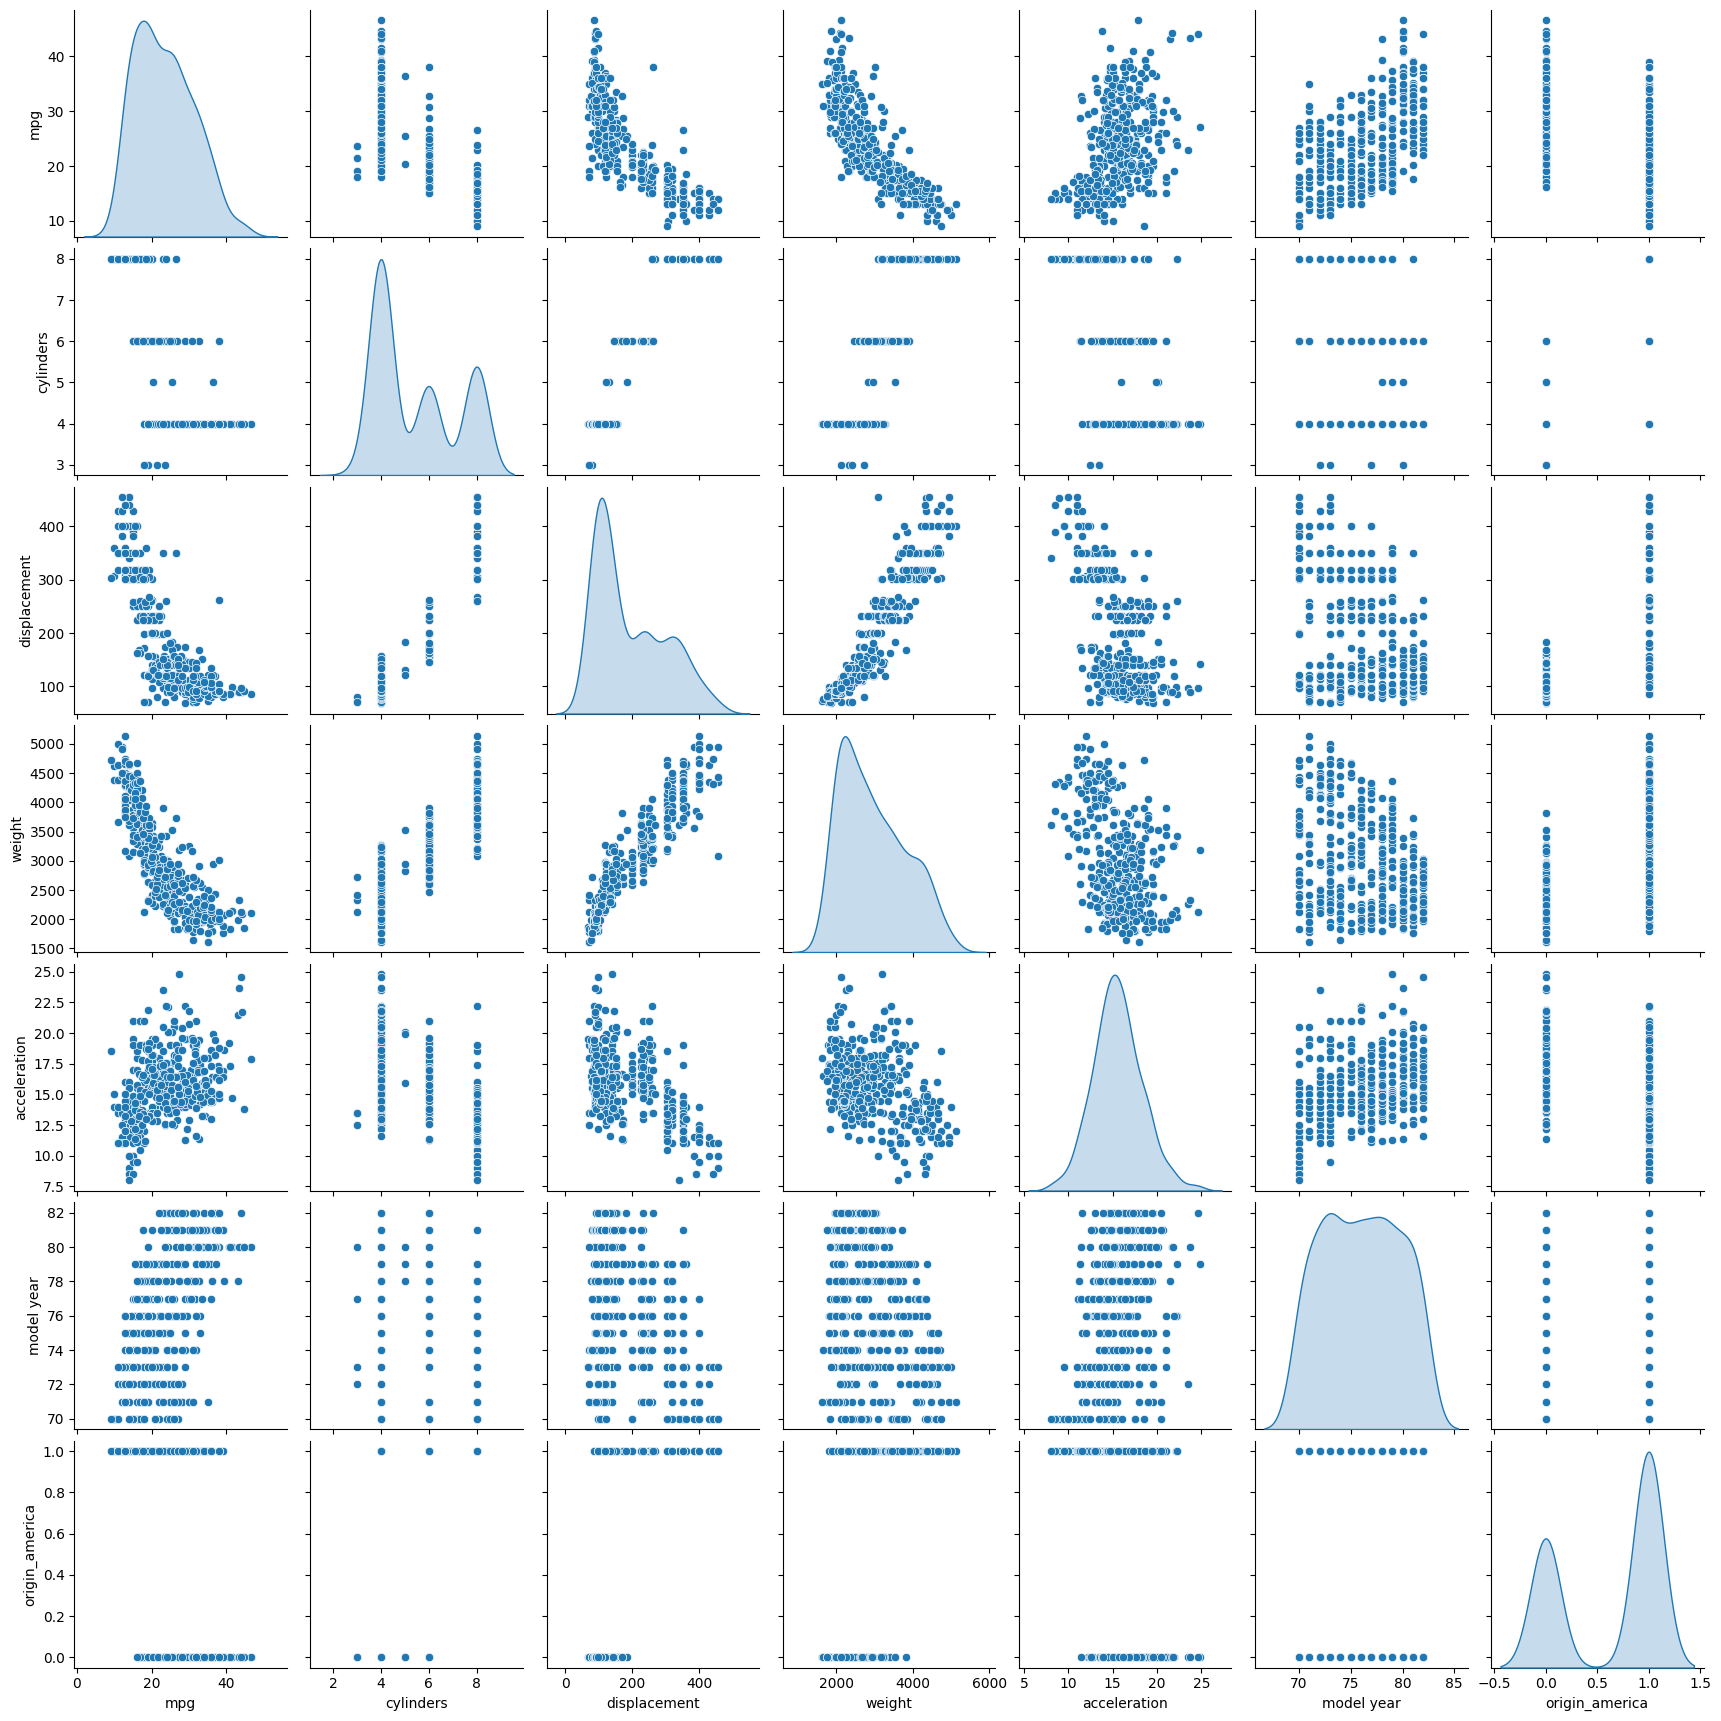

In [12]:
data_attr = data.iloc[:, 0:7]
sns.pairplot(data_attr, diag_kind='kde')

## Splitting the Data

In [13]:
xvars=data.drop(["mpg"], axis=1)
yvar=data[['mpg']]



x_train, x_test, y_train, y_test = train_test_split(xvars, yvar, test_size=0.30, random_state=1)

## Fit Linear Model

In [14]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)


LinearRegression()

In [15]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

intercept = regression_model.intercept_[0]
print("\n\nThe intercept for our model is {}".format(intercept))

The coefficient for cylinders is -0.39480796616482855
The coefficient for displacement is 0.028945510765487393
The coefficient for weight is -0.007352032065147333
The coefficient for acceleration is 0.06191936600761811
The coefficient for model year is 0.8369338917644996
The coefficient for origin_america is -3.001283000918515
The coefficient for origin_asia is -0.6060179643247401
The coefficient for numericHP is -0.02175220772354749


The intercept for our model is -18.28345111637208


In [16]:
print("R^2 for in sample ",regression_model.score(x_train, y_train))#R^2 for in sample
print("R^2 for out of sample ",regression_model.score(x_test, y_test))#R^2 for out of sample

R^2 for in sample  0.8141025501610559
R^2 for out of sample  0.843313513280883


## Adding Interaction Terms

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(x_train2, y_train)

y_pred = poly_clf.predict(x_test2)

#print(y_pred)

print(poly_clf.score(x_train2, y_train))

0.8998572125392845
